In [2]:

#importando librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
#%pip install plotly-express



In [2]:
#leer el archivo dataset 
dataset = pd.read_csv('amazonreviews.tsv', low_memory = False,sep ='\t')

In [3]:
#Mostrar las cantidades de datos
dataset.head(5)

label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  Amazing!: This soundtrack is my favorite music...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...

In [4]:
#aplicada a un dataset en Python, específicamente a 
#una estructura de datos tipo array o DataFrame, devuelve 
#una tupla que indica las dimensiones del dataset. 
#La tupla contiene dos valores: el número de filas y el número de columnas del dataset. 
dataset.shape

(10000, 2)

In [5]:
#informacion de dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


<Axes: xlabel='label'>

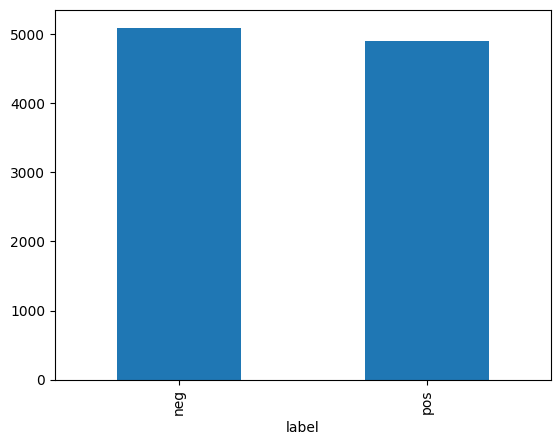

In [6]:
#visualizar rápidamente la distribución de clases o categorías en una variable, 
#lo que puede ser especialmente útil en tareas de clasificación o análisis exploratorio de datos.

dataset['label'].value_counts().plot(kind='bar')


In [7]:
#ayudar a identificar valores atípicos, detectar desequilibrios en la distribución de datos y 
#obtener una idea de la escala y la variabilidad de las variables numéricas.
dataset.describe()

label                                             review
count   10000                                              10000
unique      2                                              10000
top       neg  Stuning even for the non-gamer: This sound tra...
freq     5097                                                  1

In [ ]:
#HIPOTESIS

H0
 : no hay dificultad para usar la implementacion de un asistente virtual = 0

H1
 : si hay dificultad para usar la implementacion de un asistente virtual ≠0

In [8]:
#permite contar la cantidad de registros o muestras asociadas a cada categoría o valor 
#único en la columna 'label', lo que es útil para realizar 
#análisis de distribución o explorar la frecuencia de diferentes categorías en el dataset.

dataset.groupby('label').size()


label
neg    5097
pos    4903
dtype: int64

In [9]:
dataset_table= pd.crosstab(dataset['label'],dataset['review'])
print(dataset_table)


review  !!!! Wrong MP3 files !!!!: The MP3 files downloadable from this site are not for Parsifal but Verdi's Traviata. Amazon needs to fix this urgently.  \
label                                                                                                                                                        
neg                                                     1                                                                                                    
pos                                                     0                                                                                                    

review  $ Scam: The songs on Sliver are easily some of the best of the box but the completely ignored some of the best, also. Its said for me to watch the "Nirvana Corp." aka Courtney Love to do something like this. Ultimately, if you don't realize that this is a shtik for $ then you must be confused. Nirvana released a best of cd and then a best of the box? Im jus

In [10]:
#extraer los valores de un DataFrame para realizar operaciones numéricas o aplicar 
#otros cálculos que requieren una estructura de matriz NumPy. Al acceder directamente a los valores en 
#forma de matriz, se pueden aplicar funciones y operaciones de NumPy de manera más eficiente.
dataset_table.values 


array([[1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [11]:
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[1 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 1]]


In [12]:
val=stats.chi2_contingency(dataset_table)


In [13]:
val

Chi2ContingencyResult(statistic=10000.0, pvalue=0.4952983945386835, dof=9999, expected_freq=array([[0.5097, 0.5097, 0.5097, ..., 0.5097, 0.5097, 0.5097],
       [0.4903, 0.4903, 0.4903, ..., 0.4903, 0.4903, 0.4903]]))

In [14]:
Expected_Values=val[3]


In [15]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [16]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
     

In [17]:
print("chi-square statistic:-",chi_square_statistic)


chi-square statistic:- 1.9238767902687854


In [18]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [19]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

p-value: 0.16542991458250356
Significance level:  0.05
Degree of Freedom:  1


In [84]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

#Retener H0, No hay relación entre 2 variables categóricas
#Retener H0, No hay relación entre 2 variables categóricas

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [3]:
review_datos = pd.read_csv('amazonreviews.tsv', low_memory = False,sep ='\t')
review_datos.head(5)


label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  Amazing!: This soundtrack is my favorite music...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...

In [4]:
review_datos.shape

(10000, 2)

In [5]:
review_datos['label'].value_counts()


label
neg    5097
pos    4903
Name: count, dtype: int64

In [6]:
review_datos.isnull().sum()
review_datos.dropna(inplace=True)

<Axes: ylabel='count'>

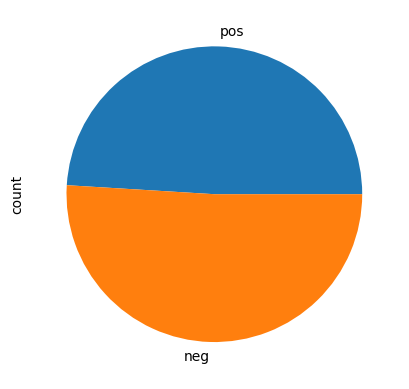

In [7]:
review_datos['label'].value_counts().sort_values().plot(kind = 'pie')


In [8]:
blanks = [] 

for i,lb,rv in review_datos.itertuples():  
    if type(rv)==str:            
        if rv.isspace():         
            blanks.append(i)     
        
review_datos.drop(blanks, inplace=True)

In [9]:
from sklearn.model_selection import train_test_split

X=review_datos['review']
y=review_datos['label']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 

#Training the model 
from sklearn.linear_model import LogisticRegression
# The pipeline: tf-idf vectorizer and logistic regression model  
lr_model=Pipeline([('tfidf', TfidfVectorizer(lowercase=False)),( 'clf',LogisticRegression(solver='lbfgs'))])

lr_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('clf', LogisticRegression())])

In [22]:
#realiza predicciones con un modelo de regresión logística, genera un informe de clasificación, lo convierte en un DataFrame, y 
#aplica un estilo degradado de color verde para resaltar los valores del informe.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

predictions= lr_model.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)

df_report = pd.DataFrame(report).transpose().round(2)

cm = sns.light_palette("green", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

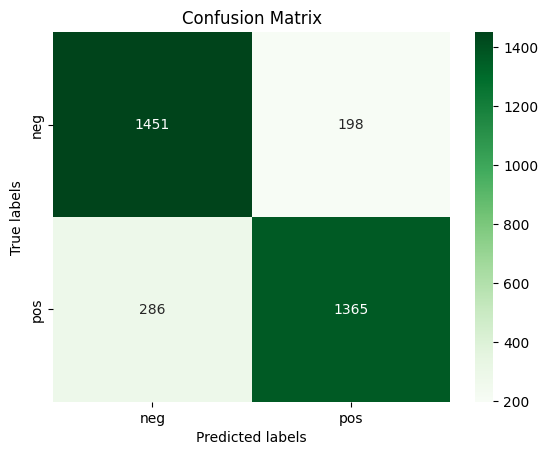

In [23]:
#Visualizing Confusion Matrix 
import matplotlib.pyplot as plt
ax= plt.subplot()
cm=confusion_matrix(y_test,predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);

#En resumen, este código crea una matriz de confusión 
# utilizando los valores de prueba (y_test) y las 
# predicciones hechas por un modelo de clasificación 
# (predictions). Luego, utiliza seaborn y matplotlib 
# para visualizar la matriz de confusión como un mapa de 
# calor en una subtrama, con etiquetas adecuadas para los 
# ejes x e y, y un título para la subtrama.